# Generating the circuit for H4

## Classical calculations:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utility import *
import tequila as tq
threshold = 1e-6 #Cutoff for UCC MP2 amplitudes and QCC ranking gradients

basis = 'sto-3g'

In [2]:
bond_lengths = np.linspace(0.8,2.7,15)
#Run FCI
FCI_PES = obtain_PES('h4', bond_lengths, basis, method='fci')
#Run HF
HF_PES = obtain_PES('h4', bond_lengths, basis,  method='hf')
#Run CCSD
CCSD_PES = obtain_PES('h4', bond_lengths, basis,  method='ccsd')

E = -1.7282808647469823 Eh
E = -1.8757673115297755 Eh
E = -1.9436685341419828 Eh
E = -1.9681168701537448 Eh
E = -1.9688717505339302 Eh
E = -1.9575160224134387 Eh
E = -1.9411219627085186 Eh
E = -1.9240069218707847 Eh
E = -1.9086207863072835 Eh
E = -1.8960726556134395 Eh
E = -1.886551035526075 Eh
E = -1.8797113367238392 Eh
E = -1.8749960099801717 Eh
E = -1.8718427824231183 Eh
E = -1.8697821728146717 Eh
E = -1.6019400748311579 Eh
E = -1.7310111342440724 Eh
E = -1.7791045408794854 Eh
E = -1.7818090946447955 Eh
E = -1.7585910209903557 Eh
E = -1.720912463577959 Eh
E = -1.6758703418708207 Eh
E = -1.6279977412549318 Eh
E = -1.5802294832603316 Eh
E = -1.534445487370811 Eh
E = -1.4917887476436846 Eh
E = -1.452871269319548 Eh
E = -1.417928630268599 Eh
E = -1.3869439492023357 Eh
E = -1.3597425710619053 Eh
E = -1.730297072383129 Eh
E = -1.8787802508847058 Eh
E = -1.9481335329118727 Eh
E = -1.9745957353524388 Eh
E = -1.9780170268528454 Eh
E = -1.9698470785114277 Eh
E = -1.9566753319492105 Eh
E = -1.

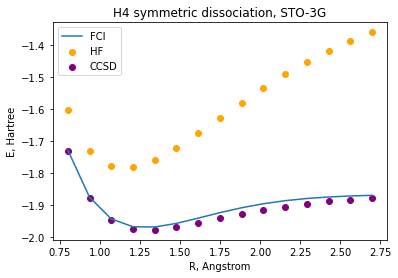

In [3]:
#Plot H4 PESs

plt.title('H4 symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

## Generating Qubit Hamiltonians

In [4]:
qubit_transf = 'jw' # Jordan-Wigner transformations
h4 = get_qubit_hamiltonian(mol='h4', geometry=1.5, basis='sto3g', qubit_transf=qubit_transf)
print(h4)

-0.8823205468513752 [] +
-0.034058385022492754 [X0 X1 Y2 Y3] +
-0.0340583850225138 [X0 X1 Y4 Y5] +
-0.023093664326494255 [X0 X1 Y6 Y7] +
0.034058385022492754 [X0 Y1 Y2 X3] +
0.0340583850225138 [X0 Y1 Y4 X5] +
0.023093664326494255 [X0 Y1 Y6 X7] +
-0.011573113480190935 [X0 Z1 X2 X4 Z5 X6] +
-0.035257520327649984 [X0 Z1 X2 X5 Z6 X7] +
-0.035257520327649984 [X0 Z1 X2 Y5 Z6 Y7] +
-0.011573113480190928 [X0 Z1 Y2 Y4 Z5 X6] +
0.03525752032764998 [X0 Z1 Z2 X3 Y4 Z5 Z6 Y7] +
0.023684406847459046 [X0 Z1 Z2 X3 X5 X6] +
-0.03525752032764998 [X0 Z1 Z2 Y3 Y4 Z5 Z6 X7] +
0.023684406847459046 [X0 Z1 Z2 Y3 Y5 X6] +
-4.046981332494459e-08 [X0 Z1 Z2 Z3 Z4 Z5 X6] +
0.034058385022492754 [Y0 X1 X2 Y3] +
0.0340583850225138 [Y0 X1 X4 Y5] +
0.023093664326494255 [Y0 X1 X6 Y7] +
-0.034058385022492754 [Y0 Y1 X2 X3] +
-0.0340583850225138 [Y0 Y1 X4 X5] +
-0.023093664326494255 [Y0 Y1 X6 X7] +
-0.011573113480190928 [Y0 Z1 X2 X4 Z5 Y6] +
-0.011573113480190935 [Y0 Z1 Y2 Y4 Z5 Y6] +
-0.035257520327649984 [Y0 Z1 Y2 X5 Z6 

In [5]:
h4_tapered = taper_hamiltonian(h4, n_spin_orbitals=8, n_electrons=4, qubit_transf=qubit_transf)

## Tequila stuff

In [6]:
trotter_steps = 1

xyz_data = get_molecular_data('h4', geometry=1.5, xyz_format=True)
basis='sto-3g'

h4_tq = tq.quantumchemistry.Molecule(geometry=xyz_data, basis_set=basis)

print('Number of spin-orbitals (qubits): {} \n'.format(2*h4_tq.n_orbitals))

E_FCI = h4_tq.compute_energy(method='fci')

print('FCI energy: {}'.format(E_FCI))

Number of spin-orbitals (qubits): 8 

FCI energy: -1.9551250115194319


In [ ]:
H = h4_tq.make_hamiltonian()

print("\nHamiltonian has {} terms\n".format(len(H)))

U_UCCSD = h4_tq.make_uccsd_ansatz(initial_amplitudes='MP2',threshold=threshold, trotter_steps=trotter_steps)

E = tq.ExpectationValue(H=H, U=U_UCCSD)

print('\nNumber of UCCSD amplitudes: {} \n'.format(len(E.extract_variables())))

print('\nStarting optimization:\n')

result = tq.minimize(objective=E, method="BFGS", initial_values={k:0.0 for k in E.extract_variables()}, tol=1e-6)

print('\nObtained UCCSD energy: {}'.format(result.energy))


Hamiltonian has 93 terms



In [ ]:
#Define number of entanglers to enter ansatz
n_ents = 1

#Rank entanglers using energy gradient criterion
ranked_entangler_groupings = generate_QCC_gradient_groupings(H.to_openfermion(), 
                                                             2*h4.n_orbitals, 
                                                             hf_reference, 
                                                             cutoff=threshold)

print('Grouping gradient magnitudes (Grouping : Gradient magnitude):')
for i in range(len(ranked_entangler_groupings)):
    print('{} : {}'.format(i+1,ranked_entangler_groupings[i][1]))


entanglers = get_QCC_entanglers(ranked_entangler_groupings, n_ents, 2*h4.n_orbitals)

print('\nSelected entanglers:')
for ent in entanglers:
    print(ent)

In [ ]:
H = tq.QubitHamiltonian.from_openfermion(get_qubit_hamiltonian('h4', 2, 'sto-3g', qubit_transf='jw'))

a = tq.Variable("tau_0")
U = construct_QMF_ansatz(8)
for ent in entanglers:
    U += tq.gates.ExpPauli(paulistring=tq.PauliString.from_string(ent), angle=a)
print(U)

